In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
threshold = 1.6855447430592224e-8
f1 = open('./q1/linearX.csv')
f2 = open('./q1/linearY.csv')

Data = np.zeros(shape=(100,2))

cnt = 0
for x in f1:
	Data[cnt][0] = float(x.split('\n')[0])
	cnt += 1

cnt = 0
for y in f2:
	Data[cnt][1] = float(y.split('\n')[0])
	cnt += 1

# Normalizing
temp = Data[:,0].copy()
temp -= np.mean(Data[:, 0])
temp /= np.std(Data[:, 0])
Data[:, 0] = temp

temp = Data[:,1].copy()
temp -= np.mean(Data[:, 1])
temp /= np.std(Data[:, 1])
Data[:, 1] = temp

In [15]:
def update_line(hl, new_data):
	xdata, ydata, zdata = hl._verts3d
	hl.set_xdata(list(np.append(xdata, new_data[0])))
	hl.set_ydata(list(np.append(ydata, new_data[1])))
	hl.set_3d_properties(list(np.append(zdata, new_data[2])))
	plt.draw()

theta = np.ones(2)
learning_rate = 0.05

def hypothesis(x, theta):
	return theta[0] + x*theta[1]

def cost(Data, theta):
	# print('Y')
	sum = 0
	for i in range(100):
			sum = sum + (0.01*(Data[i,1]-hypothesis(Data[i,0], theta))**2)/2
	return sum

# gradient of J(theta)
def error(Data, theta, num):
	sum = 0
	if num == 0:
		for i in range(100):
			sum = sum + (0.01*(Data[i,1]-hypothesis(Data[i,0], theta)))/2	
	elif num == 1:
		for i in range(100):
			sum = sum + (0.01*num*Data[i,0]*(Data[i,1]-hypothesis(Data[i,0], theta)))/2
	return sum

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    plt.title("Data Set Q1") 
    plt.xlabel("Acidity of wine") 
    plt.ylabel("Density of wine") 
    plt.plot(Data[:,0], Data[:,1], "ob")
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    plt.show()

In [16]:
theta_hist_0 = []
theta_hist_1 = []
cost_hist = []
diff = 1
i=0
while(diff>threshold):

    # to make it faster - CAUTION: making it more than 0.05 is actually making the cost diverging
    # if i<10:
    # 	learning_rate = 0.05
    theta_hist_0.append(theta[0])
    theta_hist_1.append(theta[1])

    temp = cost(Data, theta)
    cost_hist.append(temp)

    theta[0] = theta[0] + learning_rate*error(Data, theta, 0)
    theta[1] = theta[1] + learning_rate*error(Data, theta, 1)
    diff = temp - cost(Data, theta)
    # print('Cost: ', temp)
    i += 1
print('converged in %s iterations' % str(len(cost_hist)))

converged in 543 iterations


In [9]:
# def gd(Data, theta, threshold, learning_rate):
#     theta_hist_0 = []
#     theta_hist_1 = []
#     cost_hist = []
#     diff = 1
#     i=0
#     while(diff>threshold):
#         # to make it faster - CAUTION: making it more than 0.05 is actually making the cost diverging
#         # if i<10:
#         # 	learning_rate = 0.05
#         theta_hist_0.append(theta[0])
#         theta_hist_1.append(theta[1])

#         temp = cost(Data, theta)
#         cost_hist.append(temp)

#         theta[0] = theta[0] + learning_rate*error(Data, theta, 0)
#         theta[1] = theta[1] + learning_rate*error(Data, theta, 1)
#         diff = temp - cost(Data, theta)
#         # print('Cost: ', temp)
#         i += 1
#     return theta_hist_0, theta_hist_1, cost_hist, theta

In [14]:
a0 = np.array(theta_hist_0)
a1 = np.array(theta_hist_1)
b0 = np.array(cost_hist)
opti0 = theta[0]
opti1 = theta[1]

# print(a0[0])
M, B = np.meshgrid(a0, a1)
zs = np.array([
        cost(Data, np.array([[mp], [bp]]))
        for mp, bp in zip(np.ravel(M), np.ravel(B))
    ])
Z = zs.reshape(M.shape)

KeyboardInterrupt: 

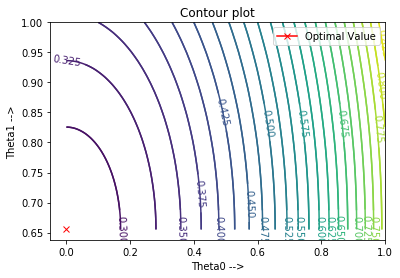

Iteration : 0


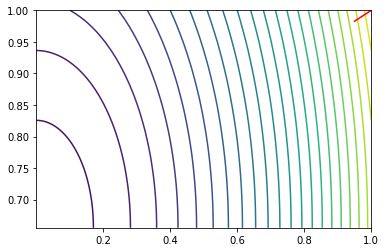

Iteration : 2


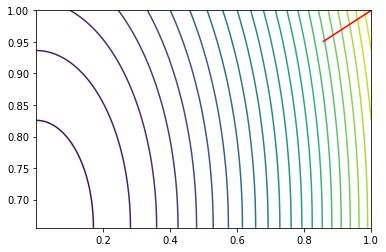

Iteration : 4


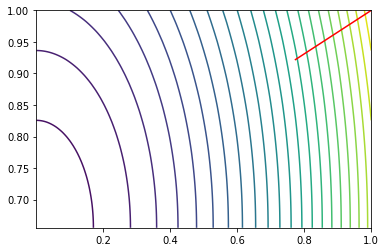

Iteration : 6


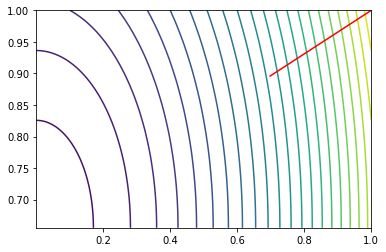

Iteration : 8


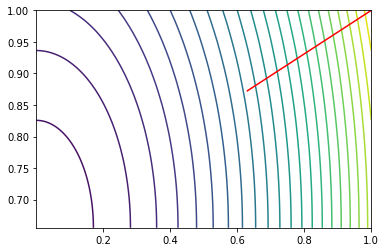

Iteration : 10


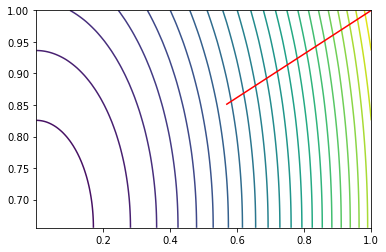

Iteration : 12


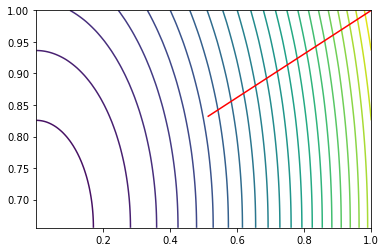

Iteration : 14


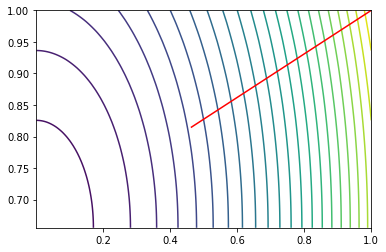

Iteration : 16


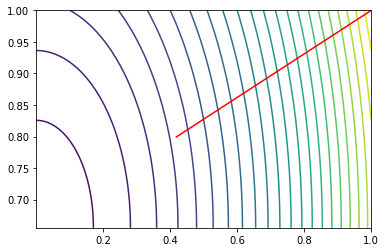

Iteration : 18


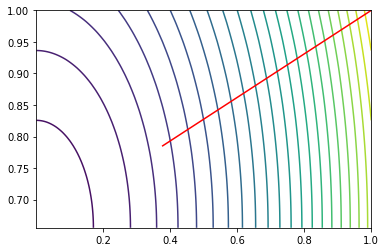

Iteration : 20


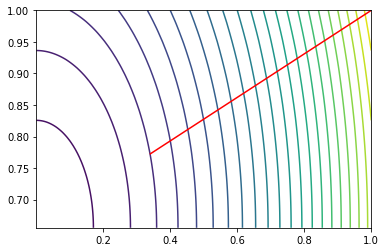

Iteration : 22


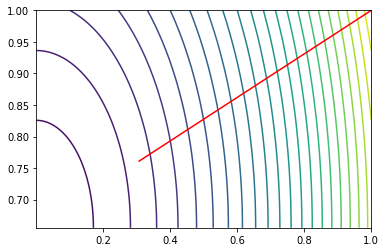

Iteration : 24


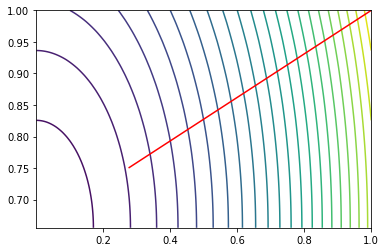

Iteration : 26


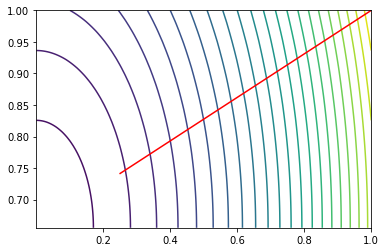

Iteration : 28


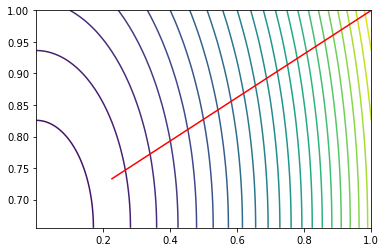

Iteration : 30


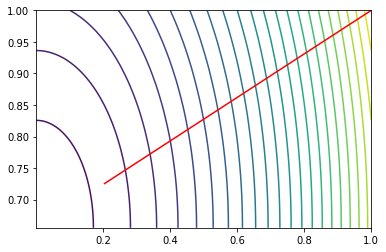

Iteration : 32


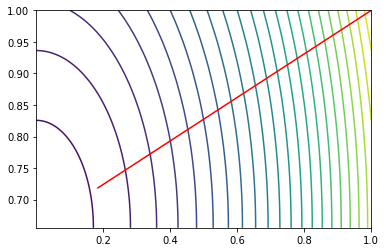

Iteration : 34


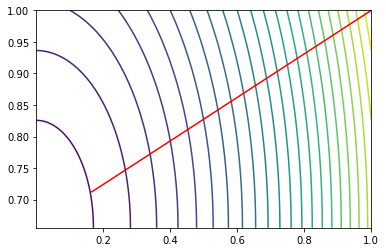

Iteration : 36


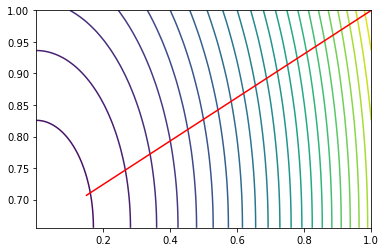

Iteration : 38


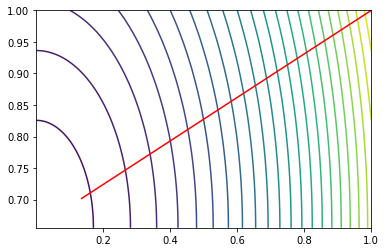

Iteration : 40


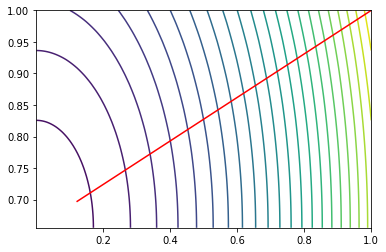

Iteration : 42


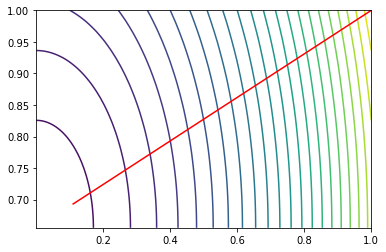

Iteration : 44


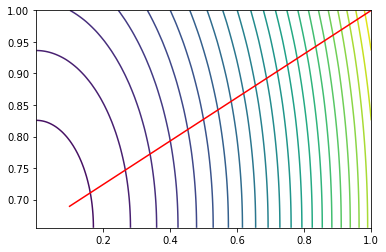

Iteration : 46


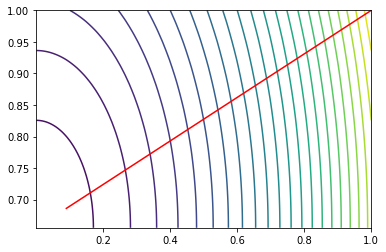

Iteration : 48


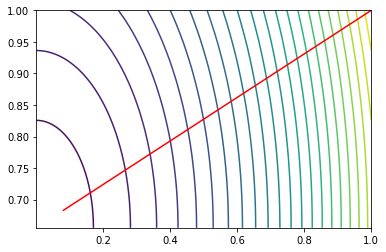

Iteration : 50


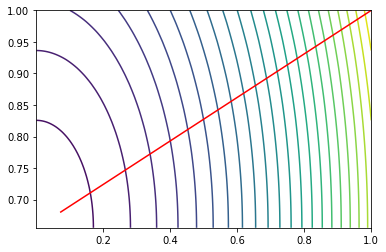

Iteration : 52


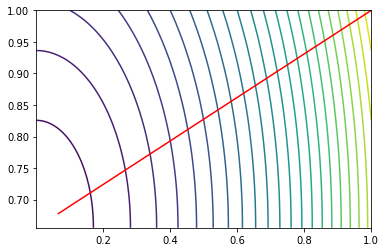

Iteration : 54


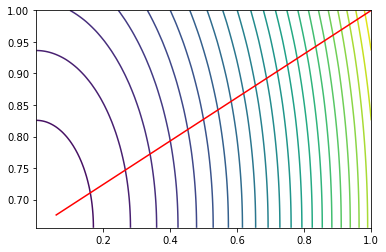

Iteration : 56


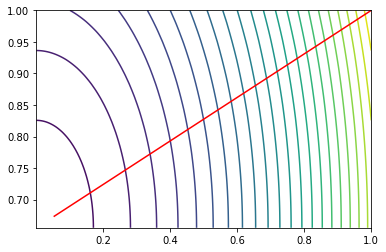

Iteration : 58


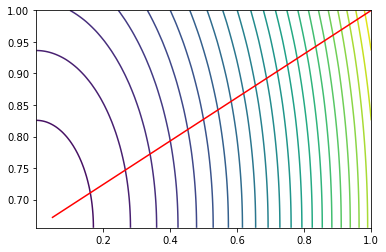

Iteration : 60


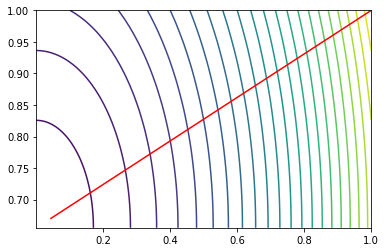

Iteration : 62


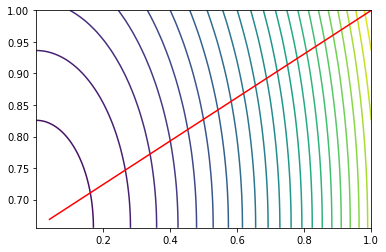

Iteration : 64


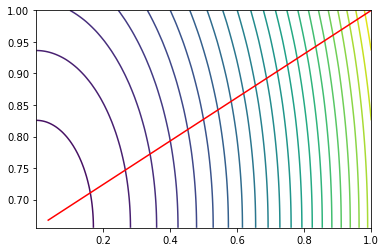

Iteration : 66


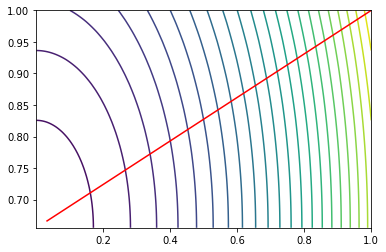

Iteration : 68


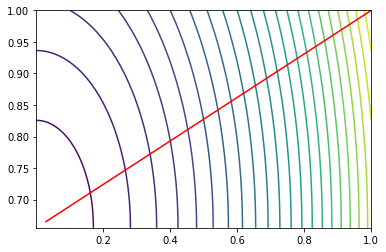

Iteration : 70


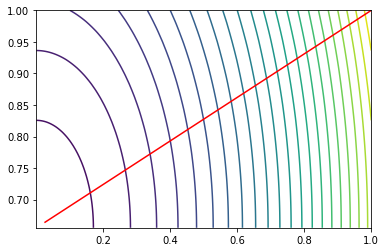

Iteration : 72


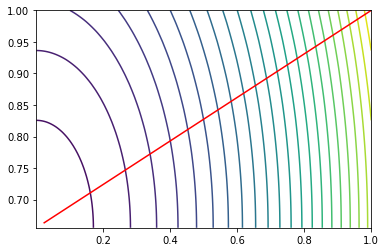

Iteration : 74


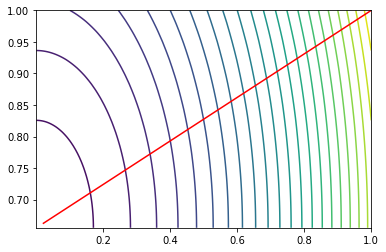

Iteration : 76


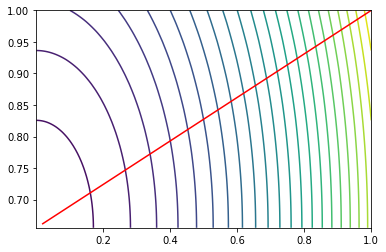

Iteration : 78


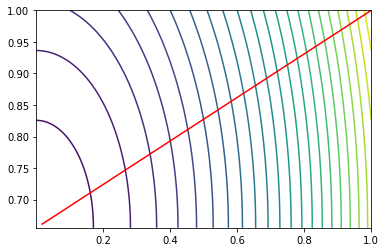

Iteration : 80


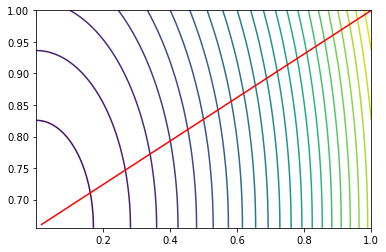

Iteration : 82


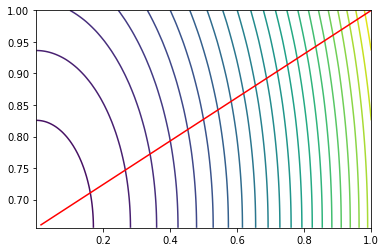

Iteration : 84


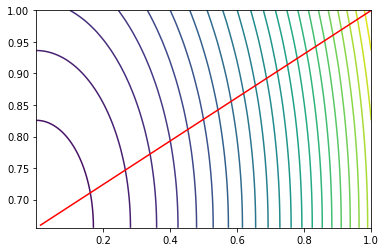

Iteration : 86


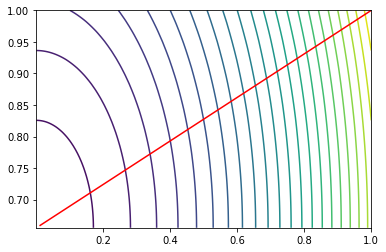

Iteration : 88


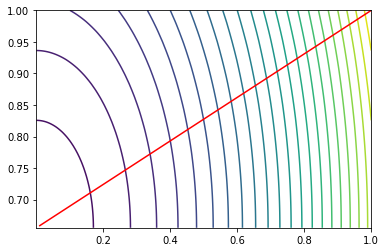

Iteration : 90


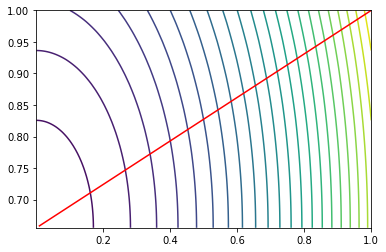

Iteration : 92


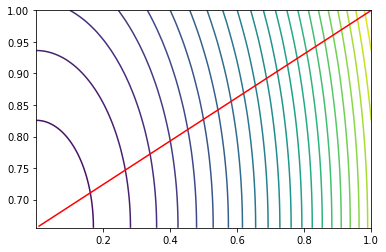

Iteration : 94


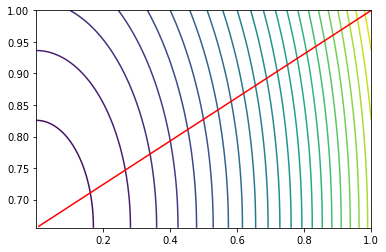

Iteration : 96


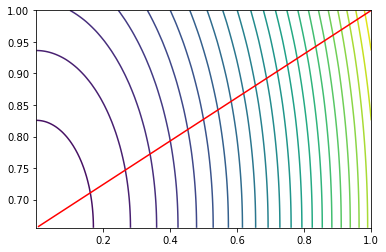

Iteration : 98


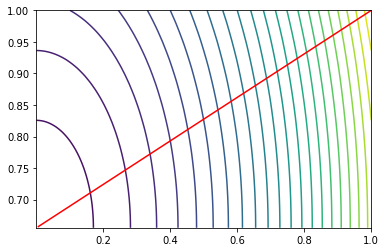

Iteration : 100


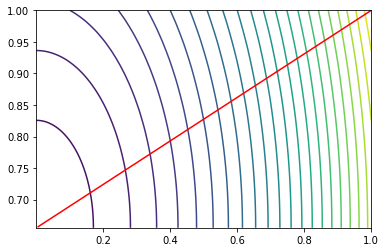

Iteration : 102


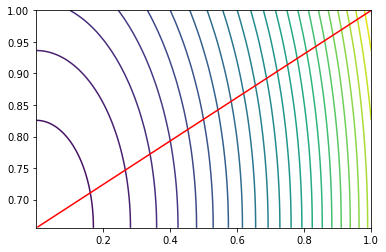

Iteration : 104


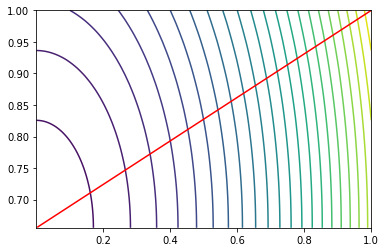

Iteration : 106


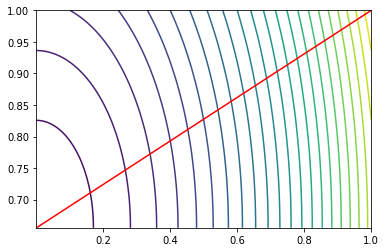

Iteration : 108


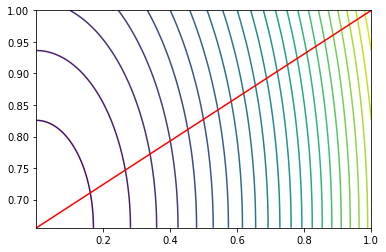

Iteration : 110


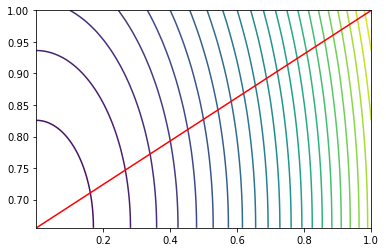

Iteration : 112


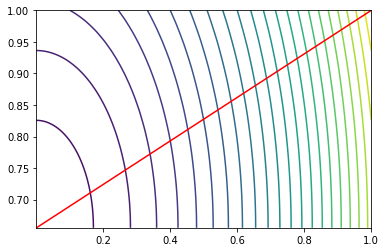

Iteration : 114


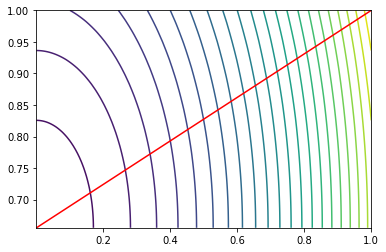

Iteration : 116


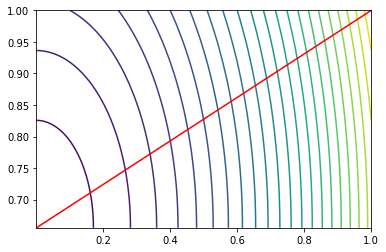

Iteration : 118


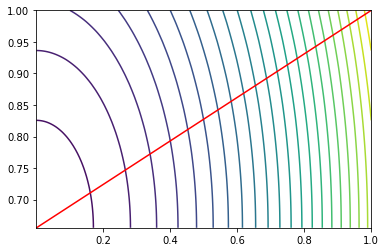

Iteration : 120


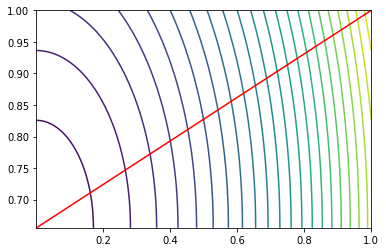

Iteration : 122


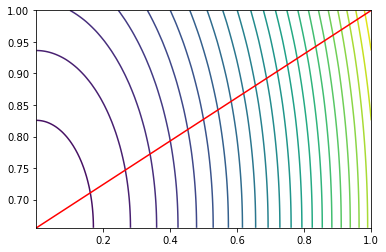

Iteration : 124


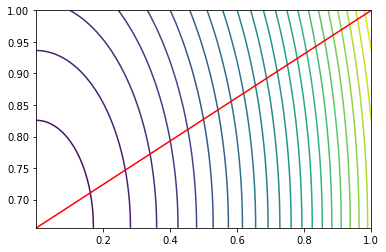

Iteration : 126


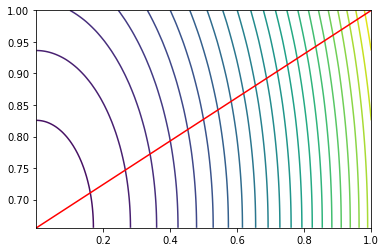

Iteration : 128


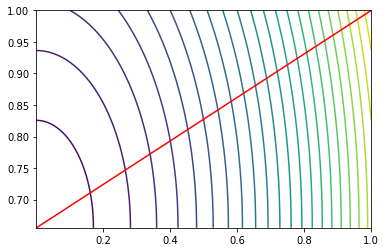

Iteration : 130


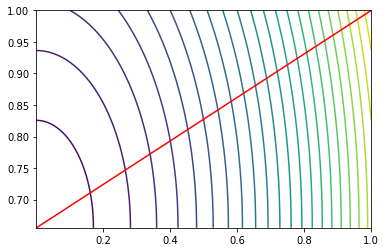

Iteration : 132


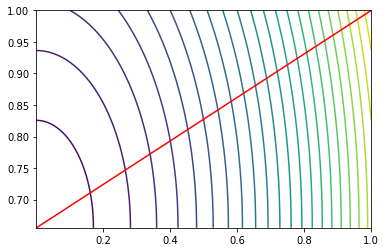

Iteration : 134


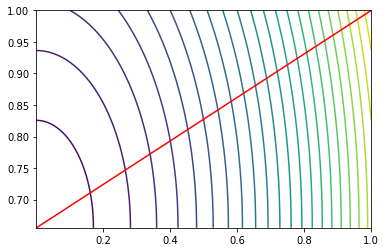

Iteration : 136


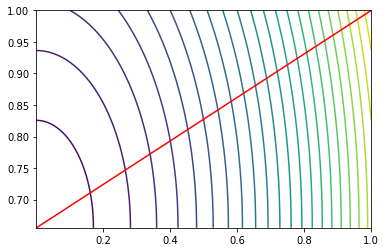

Iteration : 138


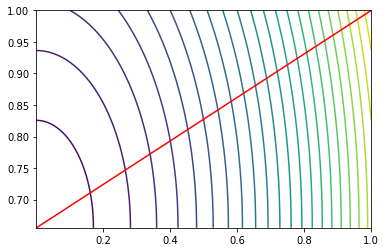

Iteration : 140


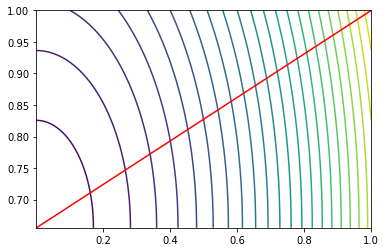

Iteration : 142


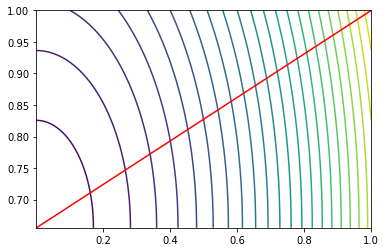

Iteration : 144


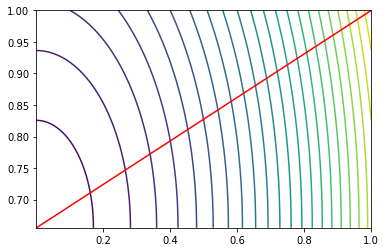

Iteration : 146
It converges in 148 iterations



In [11]:
fig = plt.figure()
CS = plt.contour(M, B, Z, 25)
plt.clabel(CS, inline=1, fontsize=10)
plt.plot([opti0], [opti1], color='r', marker='x', label='Optimal Value')
plt.legend()
plt.xlabel('Theta0 -->')
plt.ylabel('Theta1 -->')
plt.title('Contour plot')
for i in range(0, len(cost_hist), 2):
    CS = plt.contour(M, B, Z, 25)
    plt.plot(a0[:i], a1[:i], color='r')
    plt.draw()
    plt.pause(0.2)
    print('Iteration : ' + str(i))

print('It converges in ' + str(len(cost_hist)) + ' iterations\n')
# plt.savefig('lub.png')
plt.show(block=False)

In [19]:
# eta = [0.001, 0.025, 0.1]
# for e in eta:
#     theta_hist_0, theta_hist_1, cost_hist, theta = gd(Data, theta, threshold, e)
#     print(theta)
#     a0 = np.array(theta_hist_0)
#     a1 = np.array(theta_hist_1)
#     b0 = np.array(cost_hist)
#     opti0 = theta[0]
#     opti1 = theta[1]

#     # print(a0[0])
#     M, B = np.meshgrid(a0, a1)
#     zs = np.array([
#             cost(Data, np.array([[mp], [bp]]))
#             for mp, bp in zip(np.ravel(M), np.ravel(B))
#         ])
#     Z = zs.reshape(M.shape)
    
#     fig = plt.figure()
#     CS = plt.contour(M, B, Z, 25)
#     plt.clabel(CS, inline=1, fontsize=10)
#     plt.plot([opti0], [opti1], color='r', marker='x', label='Optimal Value')
#     plt.legend()
#     plt.xlabel('Theta0 -->')
#     plt.ylabel('Theta1 -->')
#     plt.title('Contour plot')
#     for i in range(0, len(cost_hist), 2):
#         CS = plt.contour(M, B, Z, 25)
#         plt.plot(a0[:i], a1[:i], color='r')
#         plt.draw()
#         plt.pause(0.2)
#         print('Iteration : ' + str(i))

#     print('It converges in ' + str(len(cost_hist)) + ' iterations\n')
#     # plt.savefig('lub.png')
#     plt.show(block=False)
#     plt.close()

[0.00075239 0.65532395]
[0.00074298 0.65532071]
[5.18853073e-04 6.55243397e-01]
